# We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

In [2]:
# Load the dataset and explore the variables.
data = pd.read_csv('C:/Users/igrav/Desktop/ironhack/Lecture/Week_3/Day5/AP/lab-imbalanced-data-master/files_for_lab/customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
# Extract the target variable.

In [6]:
data2 = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'Churn']]
data2

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [7]:
data2['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# Extract the independent variables and scale them.

In [9]:
y = data2['Churn']
X = data2.drop('Churn', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Scaling data
transformer = StandardScaler().fit(X_train)
x_normalized = transformer.transform(X_train)
x_train_norm = pd.DataFrame(x_normalized)
x_train_norm.columns = data2.drop('Churn', axis=1).columns
x_train_norm.head()


,tenure,SeniorCitizen,MonthlyCharges
0,0.472016,-0.439475,-0.338701
1,-0.219704,-0.439475,1.030607
2,-1.236939,-0.439475,0.147022
3,-1.236939,-0.439475,-1.464319
4,-0.830045,2.275441,0.639376


In [11]:
transformer = MinMaxScaler().fit(X_test)
x_test_norm = transformer.transform(X_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=X_test.columns)
x_test_norm

,tenure,SeniorCitizen,MonthlyCharges
0,0.690141,0.0,0.018072
1,1.000000,0.0,0.011044
2,0.873239,0.0,0.502510
3,0.845070,0.0,0.054719
4,0.084507,0.0,0.005522
...,...,...,...
1404,0.661972,0.0,0.566265
1405,0.098592,0.0,0.198293
1406,0.521127,0.0,0.852410
1407,0.507042,0.0,0.807731


No     5174
Yes    1869
Name: Churn, dtype: int64


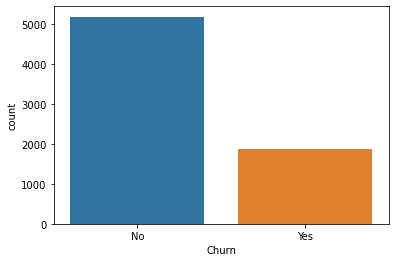

In [12]:
count_classes = data2['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = data2);
plt.show()

In [13]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train_norm, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(x_test_norm, y_test)))

The accuracy of the model in the TEST set is: 0.73


In [ ]:
# Even a simple model will give us more than 70% accuracy. Why?
### We can see on the next confusion matrix that the model only predict the main answer "no", because it is imbalanced about that rate, the easiest and higest probability is to always predit the same.

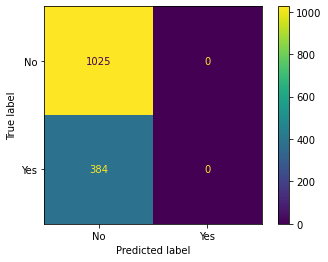

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = lr.predict(x_test_norm)
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [16]:
# Synthetic Minority Oversampling TEchnique (SMOTE)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(x_train_norm,y_train)

In [17]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8298, 3)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(x_test_norm)

In [21]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))


The accuracy in the TEST set is: 0.78


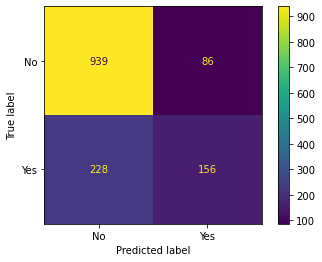

In [22]:
y_pred_test = lr.predict(x_test_norm)
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# Is it there any improvement?
### There is 5% gain in the prediction (73 to 78%) the model predicted some "Yes"